In [35]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
ylim = 10

## 2D Comparison of Texture Components for BA and No BA Alloys

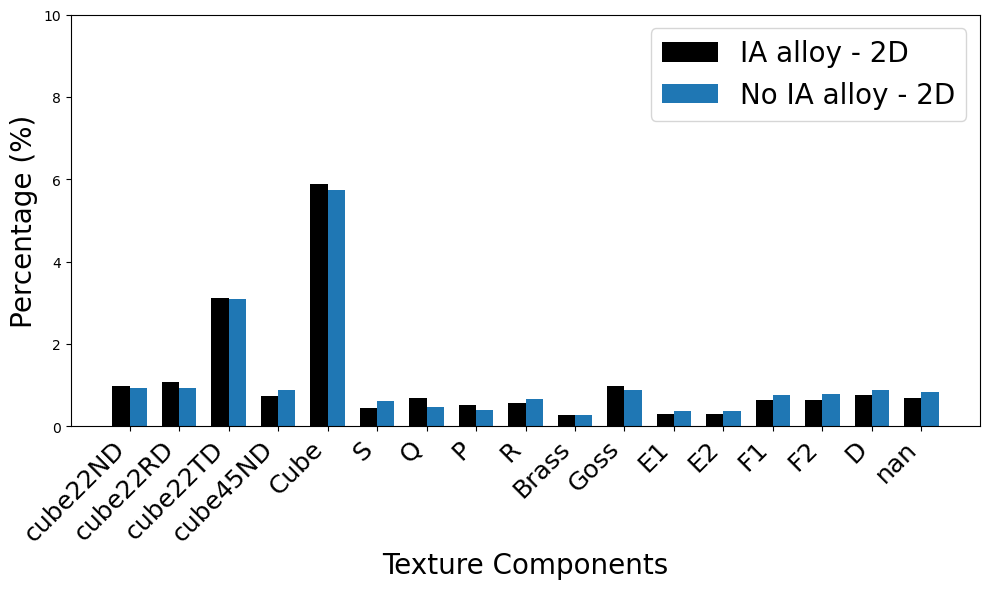

In [37]:
# Read data
df_ba = pd.read_csv("2D/BA_texture_components.csv")
df_ba.dropna(subset=["TextureComponent"], inplace=True)  # drop empty rows
df_ba = df_ba[df_ba["TextureComponent"].str.strip().ne("")]    # remove rows with blank spaces
df_ba = df_ba[df_ba["TextureComponent"] != "Total"]            # remove the "Total" row

# --- Read and clean No BA data ---
df_no_ba = pd.read_csv("2D/NoBA_texture_components.csv")
df_no_ba.dropna(subset=["TextureComponent"], inplace=True)
df_no_ba = df_no_ba[df_no_ba["TextureComponent"].str.strip().ne("")]
df_no_ba = df_no_ba[df_no_ba["TextureComponent"] != "Total"]

# --- Merge the two DataFrames on 'TextureComponent' ---
df_merged = pd.merge(df_ba, df_no_ba, on="TextureComponent", how="outer", suffixes=("_BA", "_NoBA"))
df_merged.fillna(0, inplace=True)

# Define the desired order
desired_order = ['cube22ND', 'cube22RD', 'cube22TD', 'cube45ND', 'Cube', 'S', 'Q', 'P',  'R', 'Copper', 'Brass', 'Goss', 'E1', 'E2', 'F1', 'F2', 'D']

# Convert TextureComponent to a categorical with the desired order
df_merged["TextureComponent"] = pd.Categorical(df_merged["TextureComponent"], categories=desired_order, ordered=True)

# Then sort by the categorical order
df_merged.sort_values("TextureComponent", inplace=True)


# Extract the data for plotting
components = df_merged["TextureComponent"]
percent_ba = df_merged["Percentage_BA"]
percent_no_ba = df_merged["Percentage_NoBA"]

# --- Create a grouped bar chart ---
x = np.arange(len(components))  # x positions for each group
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# BA bars in black
bars_ba = ax.bar(x - bar_width/2, percent_ba, bar_width, label="IA alloy - 2D", color="black")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x + bar_width/2, percent_no_ba, bar_width, label="No IA alloy - 2D")

# Add labels, title, and legend with increased font size
ax.set_xlabel("Texture Components", fontsize=20)
ax.set_ylabel("Percentage (%)", fontsize=20)

ax.set_xticks(x)
ax.set_xticklabels(components, rotation=45, ha="right", fontsize=18)
ax.legend(fontsize=20)

ax.set_ylim([0, ylim])

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("2D_texture_components_overall-RD.png")

plt.show()


## 2D and 3D Comparison of Texture Components for BA and No BA Alloys

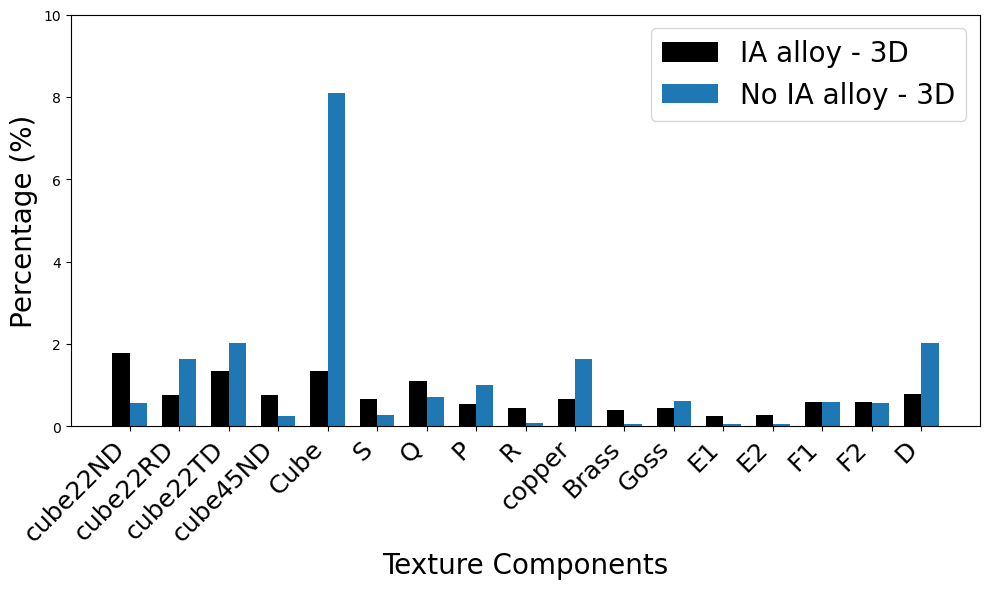

In [38]:
# Read 3D data
df_ba = pd.read_csv("3D/BA_3D_texture_components.csv")
df_ba.dropna(subset=["TextureComponent"], inplace=True)  # drop empty rows
df_ba = df_ba[df_ba["TextureComponent"].str.strip().ne("")]    # remove rows with blank spaces
df_ba = df_ba[df_ba["TextureComponent"] != "Total"]            # remove the "Total" row

# --- Read and clean No BA data ---
df_no_ba = pd.read_csv("3D/NoBA_3D_texture_components.csv")
df_no_ba.dropna(subset=["TextureComponent"], inplace=True)
df_no_ba = df_no_ba[df_no_ba["TextureComponent"].str.strip().ne("")]
df_no_ba = df_no_ba[df_no_ba["TextureComponent"] != "Total"]

# --- Merge the two DataFrames on 'TextureComponent' ---
df_merged = pd.merge(df_ba, df_no_ba, on="TextureComponent", how="outer", suffixes=("_BA", "_NoBA"))
df_merged.fillna(0, inplace=True)

# Define the desired order
desired_order = ['cube22ND', 'cube22RD', 'cube22TD', 'cube45ND', 'Cube', 'S', 'Q', 'P',  'R', 'copper', 'Brass', 'Goss', 'E1', 'E2', 'F1', 'F2', 'D']

# Convert TextureComponent to a categorical with the desired order
df_merged["TextureComponent"] = pd.Categorical(df_merged["TextureComponent"], categories=desired_order, ordered=True)

# Then sort by the categorical order
df_merged.sort_values("TextureComponent", inplace=True)
# Extract the data for plotting
components = df_merged["TextureComponent"]
percent_ba = df_merged["Percentage_BA"]
percent_no_ba = df_merged["Percentage_NoBA"]

# --- Create a grouped bar chart ---
x = np.arange(len(components))  # x positions for each group
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# BA bars in black
bars_ba = ax.bar(x - bar_width/2, percent_ba, bar_width, label="IA alloy - 3D", color="black")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x + bar_width/2, percent_no_ba, bar_width, label="No IA alloy - 3D")

# Add labels, title, and legend with increased font size
ax.set_xlabel("Texture Components", fontsize=20)
ax.set_ylabel("Percentage (%)", fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(components, rotation=45, ha="right", fontsize=18)
ax.legend(fontsize=20)

ax.set_ylim([0, ylim])

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("3D_texture_components.png")

plt.show()


## 2D and 3D Comparison of Texture Components for BA Alloy

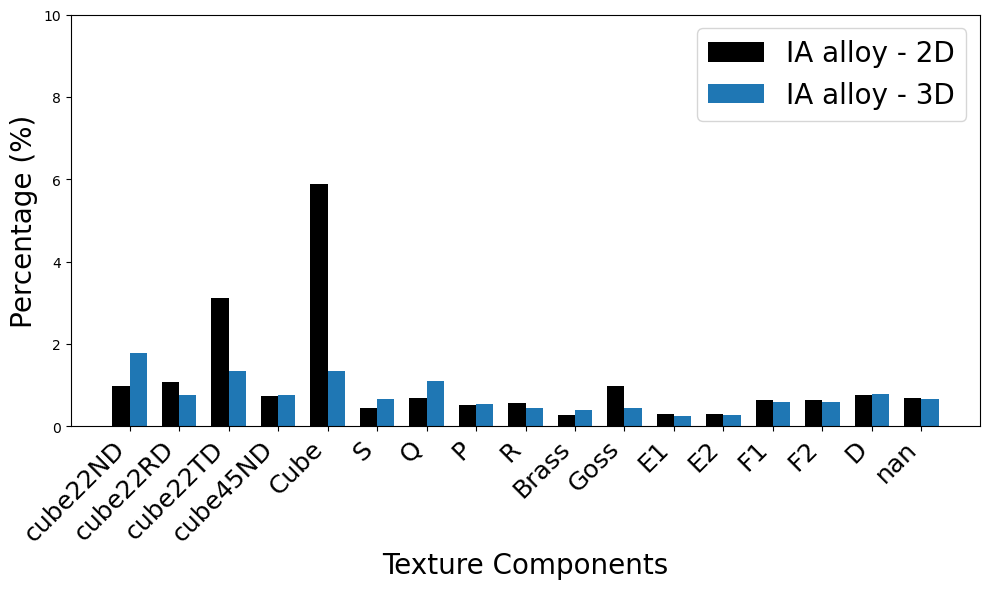

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read 2D data
df_ba2D = pd.read_csv("2D/BA_texture_components.csv")
df_ba2D.dropna(subset=["TextureComponent"], inplace=True)  # drop empty rows
df_ba2D = df_ba2D[df_ba2D["TextureComponent"].str.strip().ne("")]    # remove rows with blank spaces
df_ba2D = df_ba2D[df_ba2D["TextureComponent"] != "Total"]            # remove the "Total" row

# --- Read and clean 3D data ---
df_ba3D = pd.read_csv("3D/BA_3D_texture_components.csv")
df_ba3D.dropna(subset=["TextureComponent"], inplace=True)
df_ba3D = df_ba3D[df_ba3D["TextureComponent"].str.strip().ne("")]
df_ba3D = df_ba3D[df_ba3D["TextureComponent"] != "Total"]

# --- Merge the two DataFrames on 'TextureComponent' ---
# 'outer' join ensures all components are included, even if one file lacks some entries.
# Missing values will be filled with zero.
df_merged = pd.merge(df_ba2D, df_ba3D, on="TextureComponent", how="outer", suffixes=("_BA2D", "_BA3D"))
df_merged.fillna(0, inplace=True)

# Define the desired order
desired_order = ['cube22ND', 'cube22RD', 'cube22TD', 'cube45ND', 'Cube', 'S', 'Q', 'P',  'R', 'Copper', 'Brass', 'Goss', 'E1', 'E2', 'F1', 'F2', 'D']

# Convert TextureComponent to a categorical with the desired order
df_merged["TextureComponent"] = pd.Categorical(df_merged["TextureComponent"], categories=desired_order, ordered=True)

# Then sort by the categorical order
df_merged.sort_values("TextureComponent", inplace=True)
# Extract the data for plotting
components = df_merged["TextureComponent"]
percent_ba2D = df_merged["Percentage_BA2D"]
percent_ba3D = df_merged["Percentage_BA3D"]

# --- Create a grouped bar chart ---
x = np.arange(len(components))  # x positions for each group
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# IA alloy 2D data in black
bars_ba2D = ax.bar(x - bar_width/2, percent_ba2D, bar_width, label="IA alloy - 2D", color="black")
# IA alloy 3D data in default (blue)
bars_ba3D = ax.bar(x + bar_width/2, percent_ba3D, bar_width, label="IA alloy - 3D")

# Add labels, title, and legend with increased font size
ax.set_xlabel("Texture Components", fontsize=20)
ax.set_ylabel("Percentage (%)", fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(components, rotation=45, ha="right", fontsize=18)
ax.legend(fontsize=20)

ax.set_ylim([0, ylim])

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("2D3D_IA_texture_components.png")

plt.show()


## 2D and 3D Comparison of Texture Components for No BA Alloy

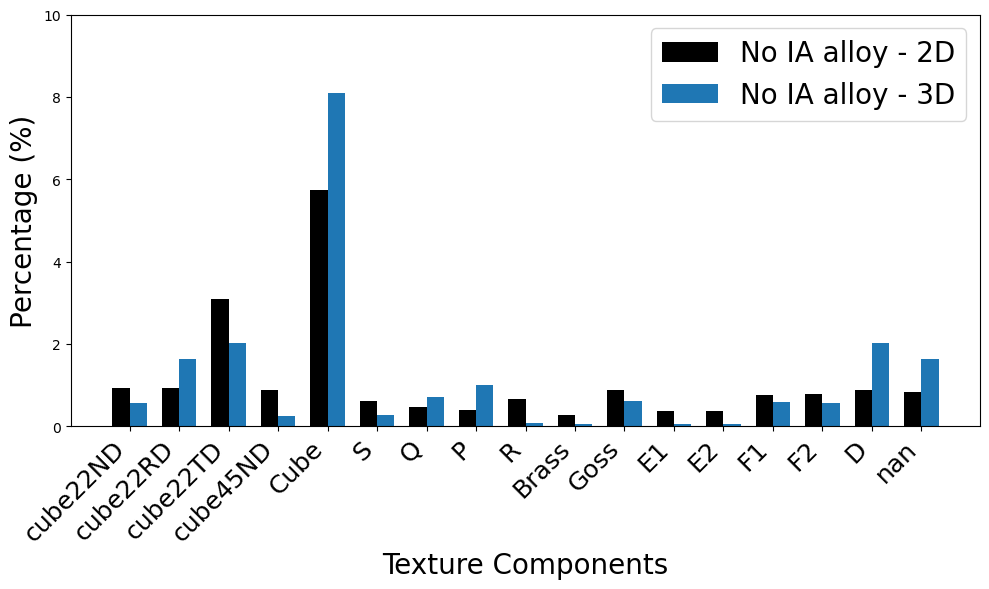

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read 3D data (No IA alloy from 2D dataset)
df_ba2D = pd.read_csv("2D/NoBA_texture_components.csv")
df_ba2D.dropna(subset=["TextureComponent"], inplace=True)  # drop empty rows
df_ba2D = df_ba2D[df_ba2D["TextureComponent"].str.strip().ne("")]    # remove rows with blank spaces
df_ba2D = df_ba2D[df_ba2D["TextureComponent"] != "Total"]            # remove the "Total" row

# --- Read and clean No IA alloy data from the 3D dataset ---
df_ba3D = pd.read_csv("3D/NoBA_3D_texture_components.csv")
df_ba3D.dropna(subset=["TextureComponent"], inplace=True)
df_ba3D = df_ba3D[df_ba3D["TextureComponent"].str.strip().ne("")]
df_ba3D = df_ba3D[df_ba3D["TextureComponent"] != "Total"]

# --- Merge the two DataFrames on 'TextureComponent' ---
# 'outer' join ensures all components are included, even if one file lacks some entries.
# Missing values will be filled with zero.
df_merged = pd.merge(df_ba2D, df_ba3D, on="TextureComponent", how="outer", suffixes=("_BA2D", "_BA3D"))
df_merged.fillna(0, inplace=True)

# Define the desired order
desired_order = ['cube22ND', 'cube22RD', 'cube22TD', 'cube45ND', 'Cube', 'S', 'Q', 'P',  'R', 'Copper', 'Brass', 'Goss', 'E1', 'E2', 'F1', 'F2', 'D']

# Convert TextureComponent to a categorical with the desired order
df_merged["TextureComponent"] = pd.Categorical(df_merged["TextureComponent"], categories=desired_order, ordered=True)

# Then sort by the categorical order
df_merged.sort_values("TextureComponent", inplace=True)
# Extract the data for plotting
components = df_merged["TextureComponent"]
percent_ba2D = df_merged["Percentage_BA2D"]
percent_ba3D = df_merged["Percentage_BA3D"]

# --- Create a grouped bar chart ---
x = np.arange(len(components))  # x positions for each group
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# No IA alloy 2D data in black
bars_ba2D = ax.bar(x - bar_width/2, percent_ba2D, bar_width, label="No IA alloy - 2D", color="black")
# No IA alloy 3D data in default (blue)
bars_ba3D = ax.bar(x + bar_width/2, percent_ba3D, bar_width, label="No IA alloy - 3D")

# Add labels, title, and legend with increased font size
ax.set_xlabel("Texture Components", fontsize=20)
ax.set_ylabel("Percentage (%)", fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(components, rotation=45, ha="right", fontsize=18)
ax.legend(fontsize=20)
ax.set_ylim([0, ylim])

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("2D3D_NoIA_texture_components.png")

plt.show()
